In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
import scipy.stats as st
import random
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split


In [ ]:
data=pd.read_csv('milknew.csv')
data

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [ ]:
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [ ]:
data.shape

(1059, 8)

In [ ]:
data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [ ]:
data.isnull().sum()

,0
pH,0
Temprature,0
Taste,0
Odor,0
Fat,0
Turbidity,0
Colour,0
Grade,0


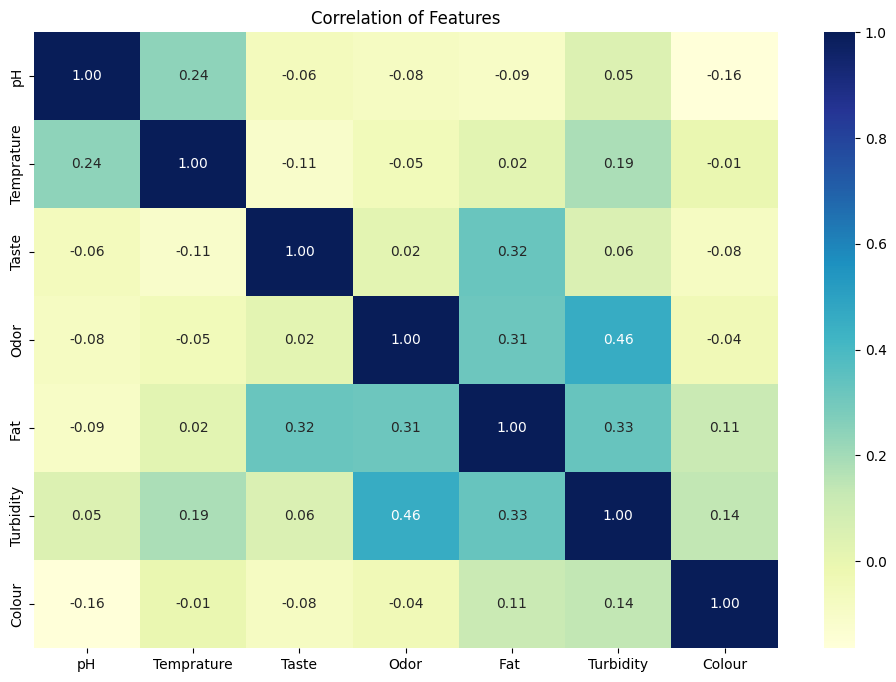

In [ ]:
corr=data.drop('Grade', axis=1).corr()
fig,ax=plt.subplots(figsize=(12,8))
sns.heatmap(corr,cmap='YlGnBu',annot=True,fmt=".2f")
plt.title("Correlation of Features")
plt.show()

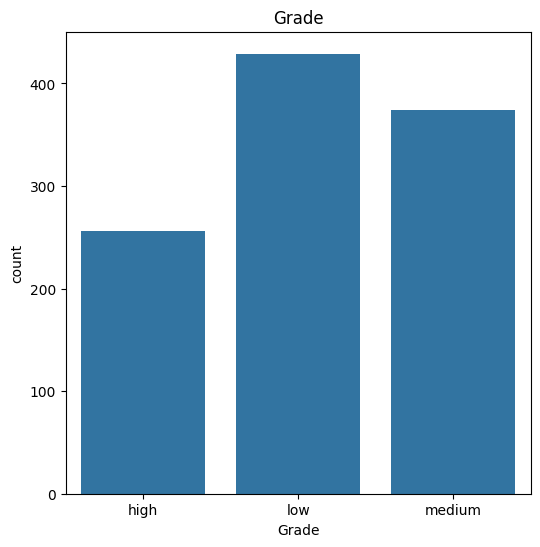

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Grade',data=data)
plt.title('Grade')
plt.show()

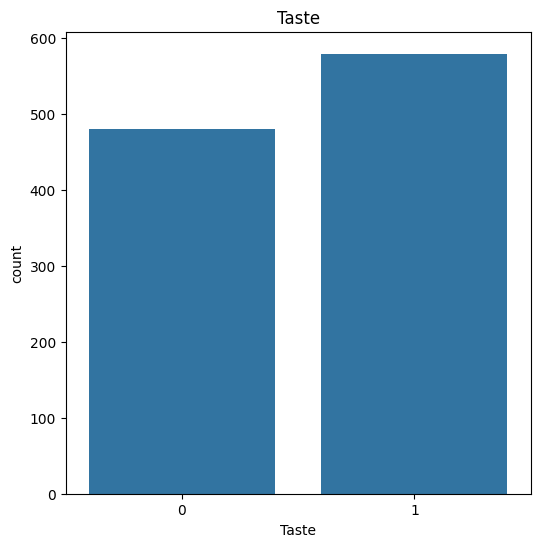

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Taste',data=data)
plt.title('Taste')
plt.show()

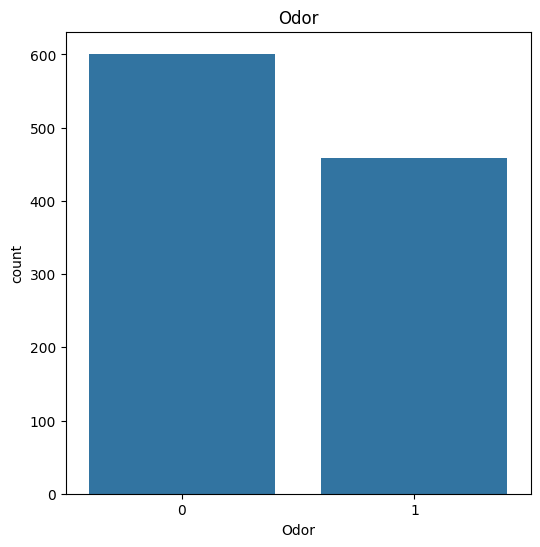

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x="Odor",data=data)
plt.title('Odor')
plt.show()

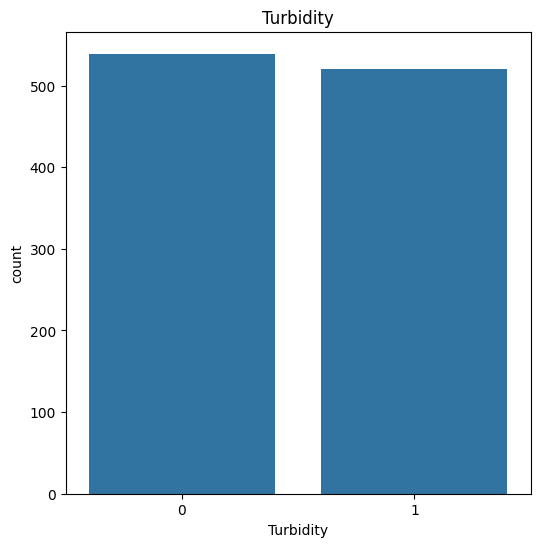

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Turbidity',data=data)
plt.title('Turbidity')
plt.show()

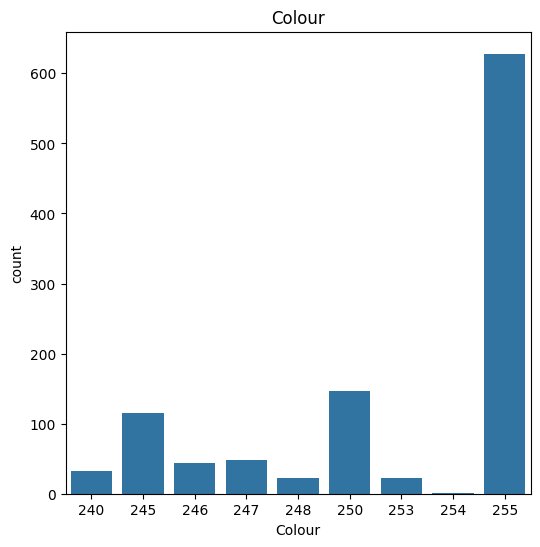

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Colour',data=data)
plt.title('Colour')
plt.show()

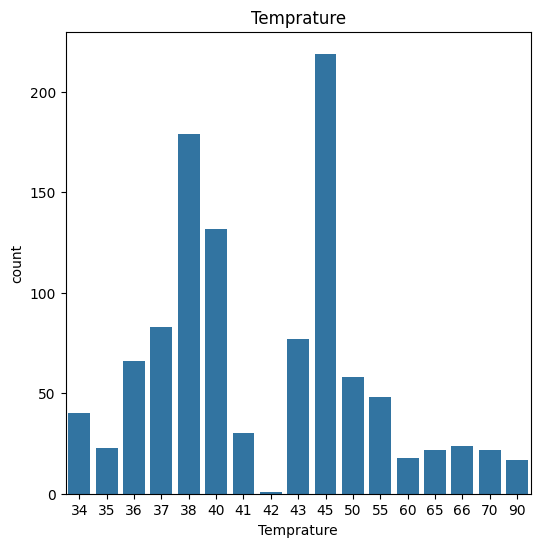

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Temprature',data=data)
plt.title('Temprature')
plt.show()

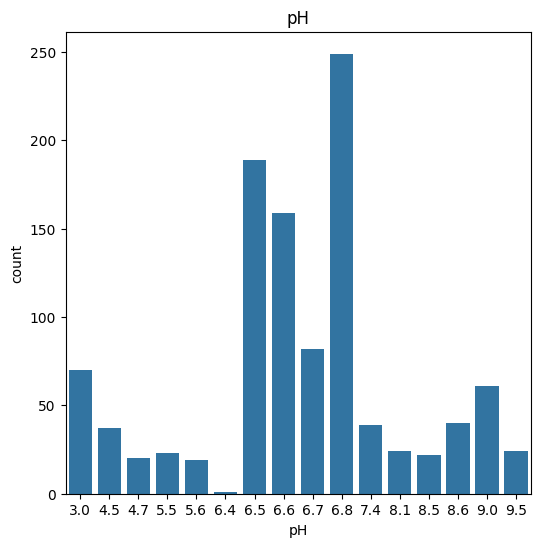

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='pH',data=data)
plt.title('pH')
plt.show()

In [ ]:
cols = ['pH', 'Temprature'] # one or more
Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
x =data.loc[:, data.columns != 'Grade']
y =data.loc[:, data.columns == 'Grade']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
#Using SVM Algorith
classifier1 = SVC(kernel='linear', random_state=0)
classifier1.fit(x_train, y_train)
y_pred1= classifier1.predict(x_test)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
metrics.accuracy_score(y_test,y_pred1)

0.9117647058823529

<Axes: >

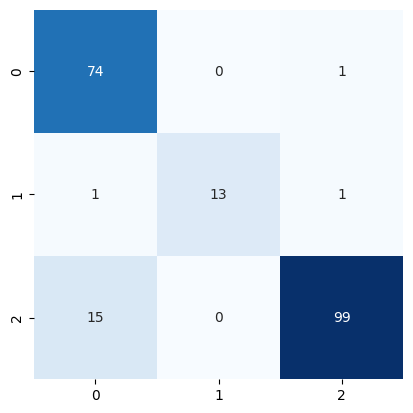

In [ ]:
res= confusion_matrix(y_test,y_pred1)
sns.heatmap(res,square=True,annot=True, cmap='Blues', fmt='d', cbar=False)


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
precision = precision_score(y_test, y_pred1,average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred1,average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred1,average='macro')
print('F1 score: %f' % f1)

Precision: 0.934140
Recall: 0.907251
F1 score: 0.915490


In [ ]:
#Decision Tree
classifier1= DecisionTreeClassifier(max_depth=3)
classifier1.fit(x_train,y_train)
y_pred1= classifier1.predict(x_test)
Accuracy=metrics.accuracy_score(y_test,y_pred1)
Accuracy

0.8382352941176471

<Axes: >

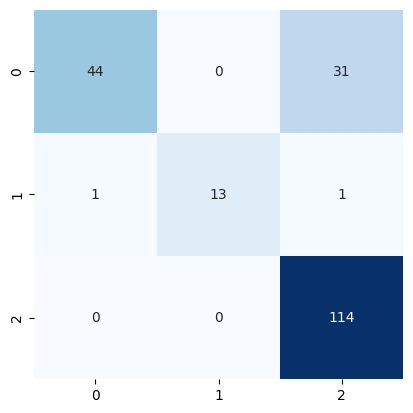

In [ ]:
res= confusion_matrix(y_test,y_pred1)
sns.heatmap(res,square=True,annot=True, cmap='Blues', fmt='d', cbar=False)

In [ ]:
precision = precision_score(y_test, y_pred1,average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred1,average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred1,average='macro')
print('F1 score: %f' % f1)

Precision: 0.919533
Recall: 0.817778
F1 score: 0.846276


In [ ]:
#naive_bayes
classifier1 = GaussianNB()
classifier1.fit(x_train, y_train)
y_pred1 = classifier1.predict(x_test)
Accuracy=metrics.accuracy_score(y_test,y_pred1)
Accuracy

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6715686274509803

<Axes: >

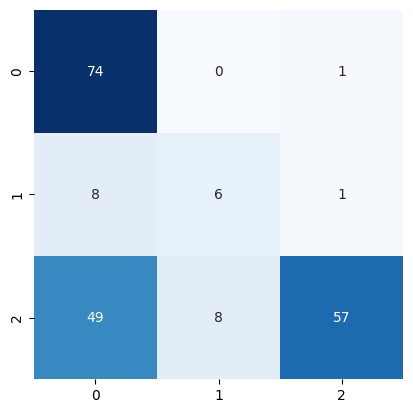

In [ ]:
res= confusion_matrix(y_test,y_pred1)
sns.heatmap(res,square=True,annot=True, cmap='Blues', fmt='d', cbar=False)

In [ ]:
precision = precision_score(y_test, y_pred1,average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred1,average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred1,average='macro')
print('F1 score: %f' % f1)

Precision: 0.653186
Recall: 0.628889
F1 score: 0.597066
